# Kihívás: Szövegelemzés az Adattudományról

> *Ebben a jegyzetfüzetben különböző URL-ekkel kísérletezünk - a Wikipédia gépi tanulásról szóló cikkével. Látható, hogy az Adattudománnyal ellentétben ez a cikk rengeteg szakkifejezést tartalmaz, ami megnehezíti az elemzést. Ki kell találnunk egy másik módszert az adatok tisztítására a kulcsszavak kinyerése után, hogy megszabaduljunk néhány gyakori, de nem jelentős szókapcsolattól.*

Ebben a példában végezzünk el egy egyszerű gyakorlatot, amely lefedi az adattudomány hagyományos folyamatának minden lépését. Nem kell kódot írnod, egyszerűen kattints az alábbi cellákra, hogy végrehajtsd őket, és figyeld meg az eredményt. Kihívásként arra bátorítunk, hogy próbáld ki ezt a kódot különböző adatokkal.

## Cél

Ebben a leckében különböző, az Adattudományhoz kapcsolódó fogalmakról beszéltünk. Próbáljunk meg további kapcsolódó fogalmakat felfedezni **szövegbányászat** segítségével. Egy Adattudományról szóló szöveggel kezdünk, kulcsszavakat nyerünk ki belőle, majd megpróbáljuk vizualizálni az eredményt.

A szöveghez a Wikipédia Adattudományról szóló oldalát fogom használni:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## 1. lépés: Az adatok beszerzése

Az adatelemzési folyamat első lépése az adatok beszerzése. Ehhez a `requests` könyvtárat fogjuk használni:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## 2. lépés: Az adatok átalakítása

A következő lépés az adatok olyan formára való átalakítása, amely alkalmas a feldolgozásra. Esetünkben letöltöttük az oldal HTML forráskódját, és ezt egyszerű szöveggé kell alakítanunk.

Számos módja van ennek megvalósítására. Mi a legegyszerűbb, beépített [HTMLParser](https://docs.python.org/3/library/html.parser.html) objektumot fogjuk használni Pythonból. Ehhez alosztályt kell létrehoznunk az `HTMLParser` osztályból, és meg kell határoznunk azt a kódot, amely összegyűjti az összes szöveget a HTML tagek között, kivéve a `<script>` és `<style>` tageket.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## 3. lépés: Elemzések nyerése

A legfontosabb lépés az, hogy az adatainkat olyan formába hozzuk, amelyből következtetéseket vonhatunk le. Esetünkben kulcsszavakat szeretnénk kinyerni a szövegből, és megnézni, mely kulcsszavak a legjelentősebbek.

A kulcsszavak kinyeréséhez a [RAKE](https://github.com/aneesha/RAKE) nevű Python könyvtárat fogjuk használni. Először telepítsük ezt a könyvtárat, ha még nincs jelen:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


A fő funkció az `Rake` objektumból érhető el, amelyet néhány paraméter segítségével testre szabhatunk. Esetünkben a kulcsszó minimális hosszát 5 karakterre, a kulcsszó minimális előfordulási gyakoriságát a dokumentumban 3-ra, és a kulcsszó maximális szószámát 2-re állítjuk. Nyugodtan kísérletezz más értékekkel, és figyeld meg az eredményt.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Megszereztünk egy listát a kifejezésekről azok fontossági fokával együtt. Ahogy látható, a legrelevánsabb területek, mint például a gépi tanulás és a big data, a lista élén szerepelnek.

## 4. lépés: Az eredmény vizualizálása

Az emberek vizuális formában tudják a legjobban értelmezni az adatokat. Ezért gyakran van értelme az adatok vizualizálásának, hogy bizonyos következtetéseket vonhassunk le. Használhatjuk a `matplotlib` könyvtárat Pythonban, hogy egyszerűen ábrázoljuk a kulcsszavak eloszlását azok relevanciájával együtt:


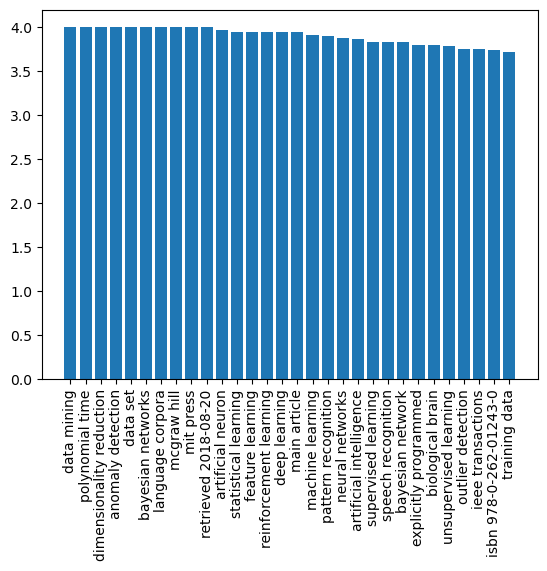

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Van azonban egy még jobb módja a szavak gyakoriságának szemléltetésére - a **Word Cloud** használata. Szükségünk lesz egy másik könyvtár telepítésére, hogy a kulcsszólistánkból szófelhőt készíthessünk.


In [71]:
!{sys.executable} -m pip install wordcloud

A `WordCloud` objektum felelős azért, hogy vagy az eredeti szöveget, vagy az előre kiszámított szavak listáját azok gyakoriságával fogadja, és egy képet ad vissza, amelyet aztán a `matplotlib` segítségével lehet megjeleníteni:


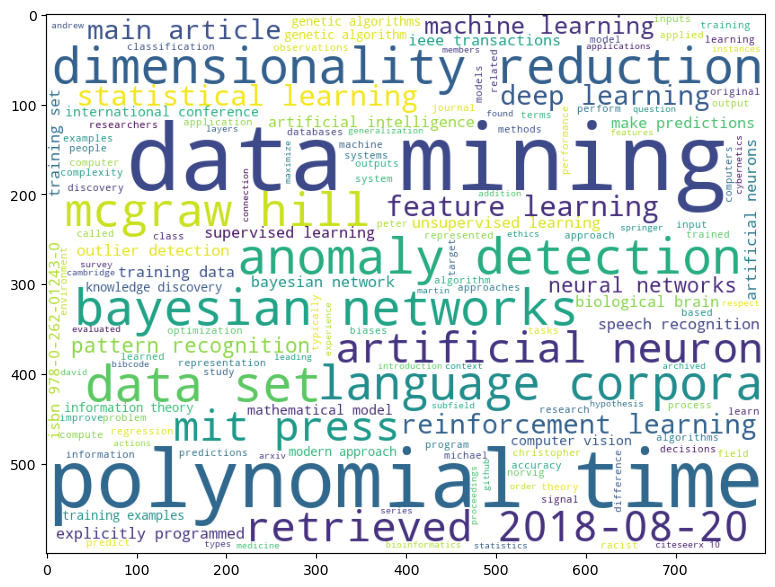

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Az eredeti szöveget is átadhatjuk a `WordCloud`-nak - nézzük meg, hogy hasonló eredményt kapunk-e:


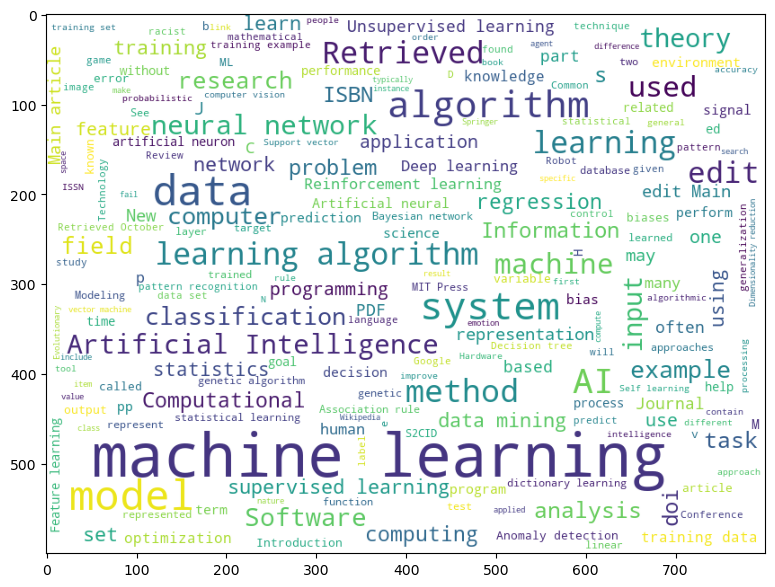

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Látható, hogy a szófelhő most sokkal lenyűgözőbb, de ugyanakkor sok zajt is tartalmaz (például olyan nem kapcsolódó szavakat, mint `Retrieved on`). Emellett kevesebb olyan kulcsszót kapunk, amelyek két szóból állnak, mint például *data scientist* vagy *computer science*. Ennek az az oka, hogy a RAKE algoritmus sokkal jobb munkát végez a jó kulcsszavak kiválasztásában a szövegből. Ez a példa jól szemlélteti az adat-előfeldolgozás és tisztítás fontosságát, mivel a végén kapott tiszta kép lehetővé teszi számunkra, hogy jobb döntéseket hozzunk.

Ebben a gyakorlatban egy egyszerű folyamatot követtünk végig, amelynek során némi jelentést vontunk ki a Wikipédia szövegéből kulcsszavak és szófelhő formájában. Ez a példa meglehetősen egyszerű, de jól bemutatja azokat a tipikus lépéseket, amelyeket egy adatkutató megtesz, amikor adatokkal dolgozik, az adatgyűjtéstől egészen a vizualizációig.

A kurzusunk során részletesen megvitatjuk ezeket a lépéseket.



---

**Felelősség kizárása**:  
Ez a dokumentum az AI fordítási szolgáltatás, a [Co-op Translator](https://github.com/Azure/co-op-translator) segítségével lett lefordítva. Bár törekszünk a pontosságra, kérjük, vegye figyelembe, hogy az automatikus fordítások hibákat vagy pontatlanságokat tartalmazhatnak. Az eredeti dokumentum az eredeti nyelvén tekintendő hiteles forrásnak. Kritikus információk esetén javasolt professzionális emberi fordítást igénybe venni. Nem vállalunk felelősséget semmilyen félreértésért vagy téves értelmezésért, amely a fordítás használatából eredhet.
